<h3>Business Problem</h3>
<p>We build a model to <b>predict how likely a customer will churn in telecommunication company</b> by analyzing its characteristics:
    <li>1. Demographic Information</li>
    <li>2. Account Information</li>
    <li>3. Services Information</li></p>
<h4>The Objective</h4>
<p>To obtain a <b>data-drive solution</b> that will allow us to <b>reduce churn rates</b> and as a consequence, to <b>increase customer satisfaction and corportation revenue</b>.</p>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import math

<h3>Data Reading</h3>
<p>The first step of the analysis consists of <b>reading and storing the data</b> in a Pandas data frame using the pandas.read_csv function.</p>

In [2]:
# import telecom dataset into a pandas data frame
df_telco = pd.read_csv('telco_churn.csv')

# visualize column names
df_telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
# check for unique values of each column
for column in df_telco.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_telco[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

<p>As shown above, the telco data set contains <b>19 independent variables</b>, which can be classified into 3 groups:</p>

<b>Demographic Information</b>
<li>gender : Whether the client is a female or a male(Female, Male).</li>
<li>SeniorCitizen : Whether the client is a senior citizen or not.(0, 1).</li>
<li>Partner : Whether the client has a partner or not(Yes, No)</li>
<li>Dependents : Whether the client has dependents or not(Yes, No).</li>

<b>Customer Account Information</b>
<li>tenure : Number of months the customer has stayed with the company.</li>
<li>Contract : Indicates the customer's current contract type(Month-to-Month, One year, Two year).</li>
<li>PaperlessBilling : Whether the client has paperless billing or not(Yes, No).</li>
<li>PaymentMethod : The customer's payment method (Electronic Check, Mailed Check, Bank Transfer, Credit Card).</li>
<li>MonthlyCharges : The amount charged to the customer monthly.</li>
<li>TotalCharges : The total amount charged to the customer.</li>

<b>Services Information</b>
<li>PhoneService : Whether the client has a phone service or not(Yes, No).</li>
<li>MultipleLines : Whether the client has multiple lines or not(No phone service, No, Yes).</li>
<li>InternetServices : Whether the client has is subscribed to Internet service with the company(DSL, Fiber optic, No).</li>
<li>OnlineSecurity : Whether the client has online security or not(No internet service, No, Yes).</li>
<li>OnlineBackup : Whether the client has online backup or not(No internet service, No, Yes).</li>
<li>DeviceProtection : Whether the client has device protection or not(No internet service, No, Yes).</li>
<li>TechSupport : Whether the client has tech support or not(No internet service, No, Yes).</li>
<li>StreamingTV : Whether the client has streaming TV or not(No internet service, No, Yes).</li>
<li>StreamingMovies : Whether the client has streaming movies or not(No internet service, No, Yes).</li>

<h3>Exploratory Data Analysis and Data Cleaning</h3>
<p><b>EDA</b> consists of analyzing the main characteristics of a dataset usually by means of <b>visualization methods</b> and <b>summary statistics</b>. The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.<p>
    
<h4>Missing Values and Data types</h4>    
<p>At the beginning of EDA, we want to know as much info as possible about the data, this is when the pandas.DataFrame.info method comes in handy. This method prints a <b>concise summary of the data frame</b>, including the column names and their data types, the number of non-null values, and the amount of memory used by the data frame.</p>

In [4]:
# summary of the data frame
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<p>As we can see above, the dataset contains <b>7043 observations</b> and <b>21 columns</b>. Apparently there are no null values on the dataset, however, we observe that the column TotalCharges was <b>wrognly detected as an object</b>. This column represents the total amount charged to the customer and it is therefore, a numeric variable. For further analysis, we need to transform this column into a <b>numeric data type</b>.</p>

In [5]:
# Transform the column TotalCharges into a numeric data type
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

In [8]:
# null observations of the TotalCharges Column
df_telco[df_telco['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<p>We can observe that the column <b>TotalCharges has 11 missing values</b>. But these observations have also tenure of 0, even though MonthlyCharges is not null. This <b>information appeared to be contradictory, and therefore, we decide to remove those observations from the data set</b>.</p>

In [9]:
# drop observations with null values
df_telco.dropna(inplace=True)

<h3>Remove CustomerID Column</h3>
<p>The <b>customerID</b> column is useless to explain whether not the customer will churn, therefore we drop this column from the dataset.</p>

In [10]:
# drop the customerID column from the dataset
df_telco.drop(columns='customerID', inplace=True)

<h3>Payment Method Denominations</h3>
<p>As shown below, some payment method denominations contain in parenthesis the word <b>automatic</b>. These denominations are too long to be used as tick labels in visualizations. Therefore, we <b>remove this clarification in parenthesis</b> from the entries of the PaymentMethod column.</p>

In [11]:
#unique elements of the PaymentMethod column
df_telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
# remove (automatic) from PaymentMethod names
df_telco['PaymentMethod'] = df_telco['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [13]:
# unique elements of the PaymentMethod column after the modification 
df_telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

<h3>Data Visualization</h3>

<h4>Response Variable</h4>
<p>Below the bar plot shows the percentage of observations that corresponds to each class of the response variable : no and yes. As we can this is an imbalanaced dataset because both classes are not equally distributed among all observations, being no the majority class(73.42%).</p>
<p>We're going to use normalized stacked bar plots to analyze the influence of each independent categorical variable in the outcome. On the other hand, we will use histograms to evaluate the influence of each independent numeric variable in the outcome.</p>

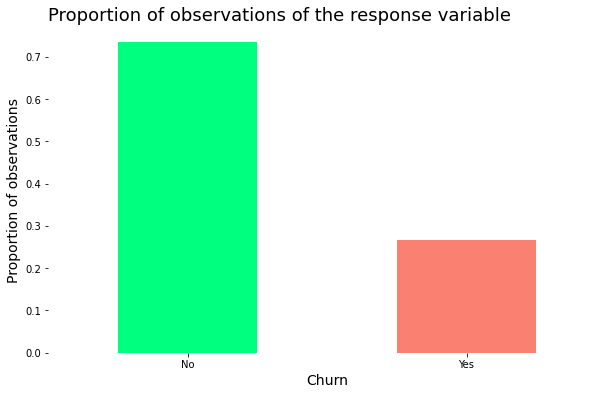

In [17]:
# create a figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df_telco['Churn'].value_counts(normalize=True)

# create a bar plot showing the % of churn
prop_response.plot(kind='bar',
                  ax=ax,
                  color=['springgreen', 'salmon'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
            fontsize=18, loc='left')
ax.set_xlabel('Churn',
             fontsize=14)
ax.set_ylabel('Proportion of observations',
             fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

<h4>Demographic Information</h4>
<p>Below we create a stacked percentage bar chart for each demogrpahic attribute - gender, SeniorCitizen, Partner, Dependents, showing the percentage of Churn for each category of the attribute.</p>

In [29]:
def percentage_stacked_plot(columns_to_plot, super_title):
    '''
    Prints 100% stacked plot of the response variable
    for independent variable of the list columns_to_plot.
    
    Params :
        columns_to_plot(list of string) : Names of the variables to plot
        super_title(string) : Super title of the visualization
        
    Returns :
        None
    '''
    num_of_columns = 2
    num_of_rows = math.ceil(len(columns_to_plot)/2)
    
    # create a fig
    fig = plt.figure(figsize=(12, 5 * num_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
    
    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        
        # createthe subplot
        ax = fig.add_subplot(num_of_rows, num_of_columns, index)
        
        # cal the % of observations of hte response variable for
        # each group of the independent variable
        prop_by_independent = pd.crosstab(df_telco[column],
                                         df_telco['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
        
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                rot=0, color=['springgreen', 'salmon'])
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                 title='Churn', fancybox=True)
        
        # set title and labels
        ax.set_title('Proportion of observations by ' + column, 
                    fontsize=16, loc='left')
        
        ax.tick_params(rotation='auto')
        
        #eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
    

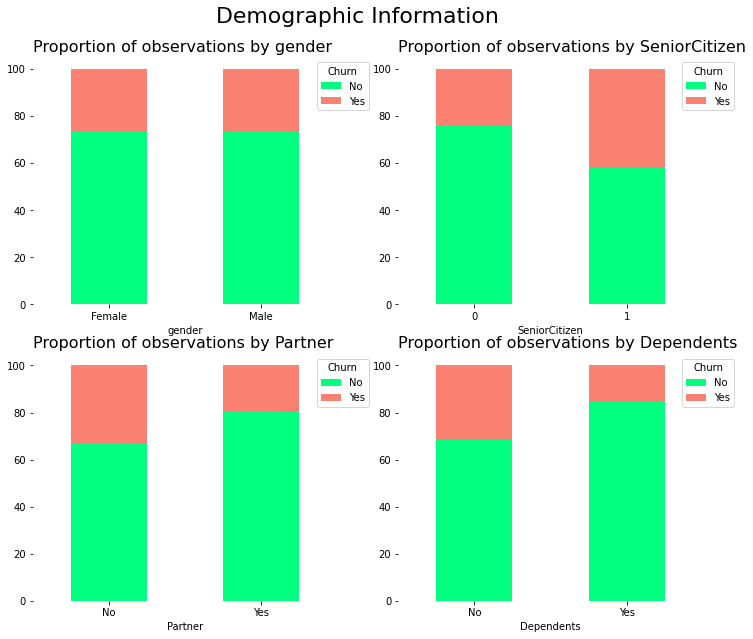

In [30]:
# Demographic Column Names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

<p>As shown above, each bar category of the independent variable, and it is subdivided to show the proportion of each response class (No and Yes).</p>
<p>We can extract <b>following conclusions</b> by analyzing <b>demogrpahic attributes</b>:
    <li>The churn rate of <b>senior citizens</b> is almost double that of <b>young citizens</b></li>
    <li>We do not expect <b>gender</b> to have significant predictive power. A similar percentage of churn is shown in both.</li>
    <li>Customers with a <b>partner</b> churn less than customers with no partners</li></p>

<h4>Customer Account Information - Categorical Variables</h4>
<p>As we did demographic attributes, we evaluate the percentage of Churn for each category of the customer account attributes(Contract, PaperlessBilling, PaymentMethod)</p>

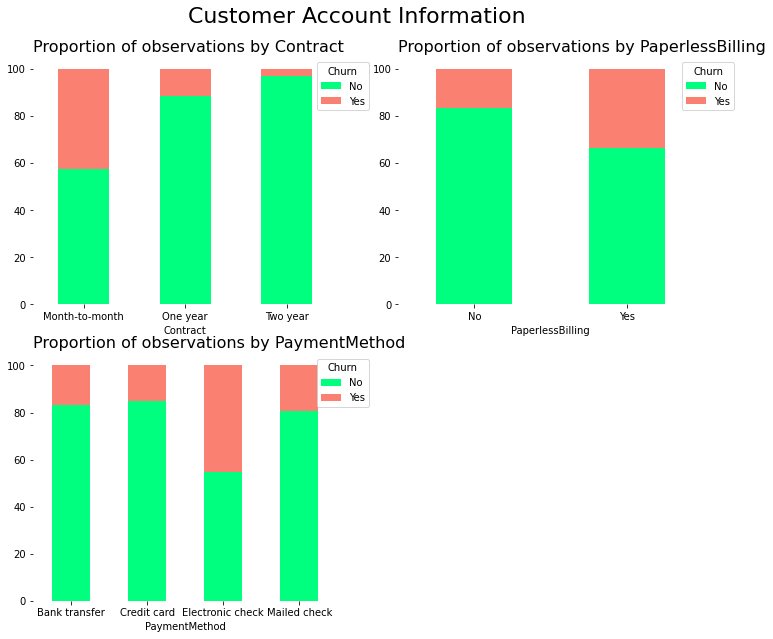

In [31]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

<p> We can extract the <b>following conclusions</b> by analyzing <b>customer account attribtues</b>:
    <li>Customers with <b>month-to-month contracts</b> have <b>higher churn rates</b> compared to clients with <b>yearly contacts.</b></li>
    <li>Customers who opted for an <b>electronic check</b> as paying method are more likely to leave the company.</li>
    <li>Customers subscriebd to <b>paperless billing</b> churn more than who are not subscribed</li></p

<h4>Customer Account Information - Numerical Variables</h4>
<p>The following plots show the distribution of tenure, MonthlyCharges, TotalCharges by Churn. For all numeric attributes, the distributions of both classes(No and Yes) are different which suggests that all of the attributes will be useful to determine whether or not a customer churns.</p>

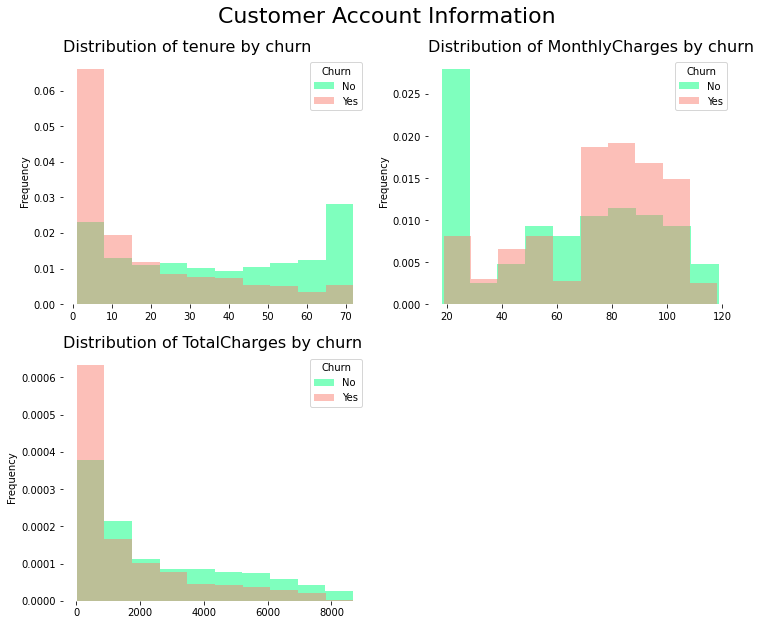

In [33]:
def histogram_plots(columns_to_plot, super_title):
    '''
    Prints a histogram for each independent variable of the list 
    columns_to_plot.
    
        Parameters:
            columns_to_plot(list of string): Names of the variables to plot
            super_title(string): Super title of the visualization
        
        Returns:
            None
    '''
    # set the num of rows and columns
    num_of_cols = 2
    num_of_rows = math.ceil(len(columns_to_plot)/2)
    
    # create a figure 
    fig = plt.figure(figsize=(12, 5 * num_of_rows)) 
    fig.suptitle(super_title, fontsize=22, y=.95)
    
    # loop to each customer account column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        
        # create the subplot
        ax = fig.add_subplot(num_of_rows, num_of_cols, index)
        
        # histograms for each class(normalized histograms)
        df_telco[df_telco['Churn']=='No'][column].plot(kind='hist',
                                                      ax=ax,
                                                      density=True,
                                                      alpha=0.5,
                                                      color='springgreen',
                                                      label='No')
        df_telco[df_telco['Churn']=='Yes'][column].plot(kind='hist',
                                                       ax=ax,
                                                       density=True,
                                                       alpha=0.5, 
                                                       color='salmon',
                                                       label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                 title="Churn", fancybox=True)
        
        # set the title and labels
        ax.set_title('Distribution of ' + column + ' by churn', 
                    fontsize=16, loc='left')
        
        ax.tick_params(rotation='auto')
        
        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of customer account columns
histogram_plots(account_columns_numeric, 'Customer Account Information')

<p>We can extract the <b>following conclusions</b> by analyzing the <b>histograms above</b>:
    <li>The churn rate tends to be larger when <b>monthly charges</b> are high.</li>
    <li>New customers (low <b>tenure</b>) are more likely to churn.</li>
    <li>Clients with high <b>total charges</b> are less likely to leave the company.</li></p>

<h4>Services Information</h4>
<p>We will evaluate the percentage of the target for each category of the service columns with stacked bar plots.</p>

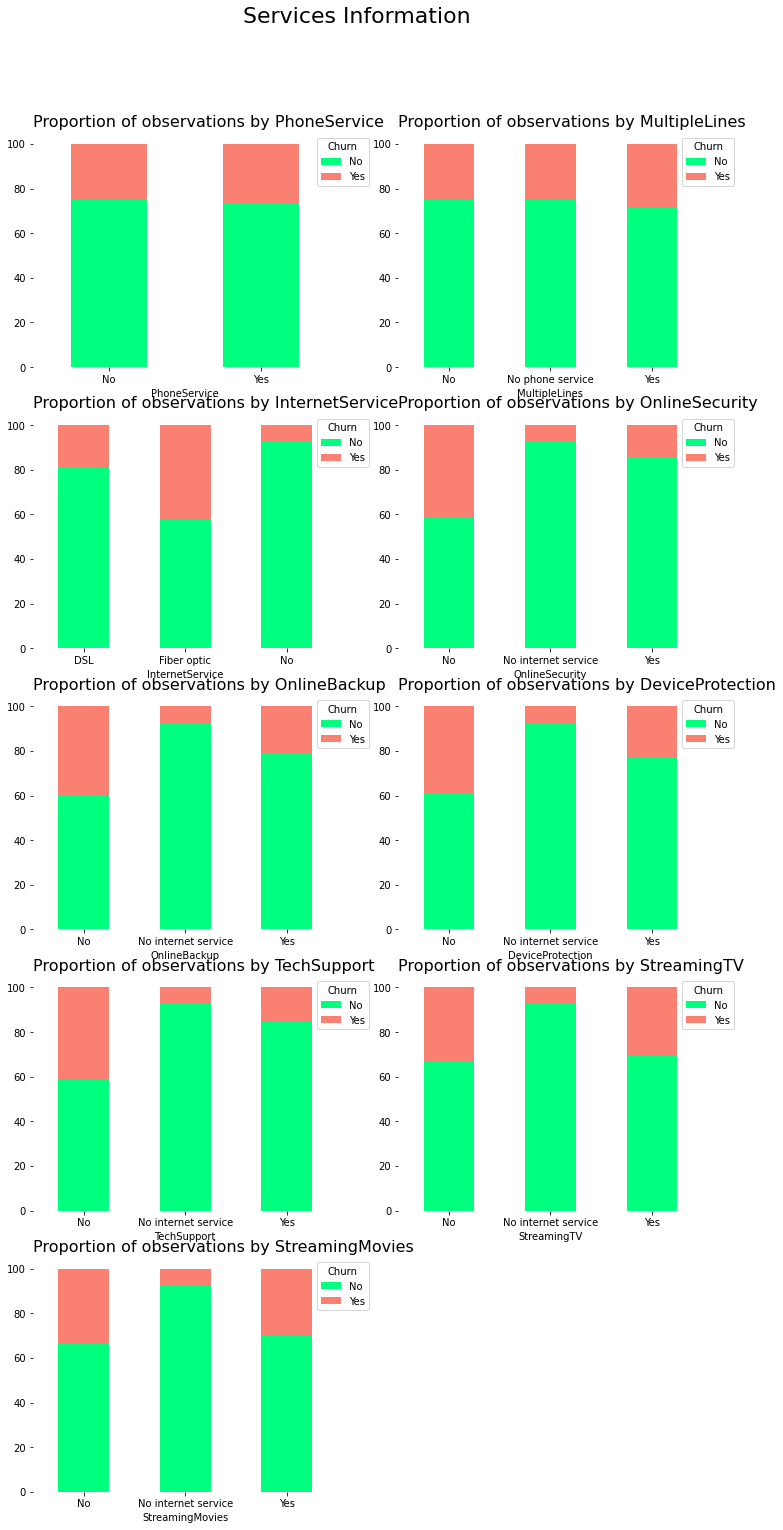

In [38]:
# service column names
services_columns = ['PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 
                    'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 
                        'Services Information')

<p>We can extract the <b>following conclusions</b> by evaluating <b>services attributes</b>:
    <li>We do not expect <b>phone attributes</b>(PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.</li>
    <li>Clients with <b>online security</b> churn less than those without it.</li>
    <li>Customers with no <b>tech support</b> tend to churn more often than those with tech support.</li></p>
<p>By looking at the plots above, we can identify the <b>most relevant attributes for detecting churn</b>.</p>